# Logistics Supply Chain Delay Prediction
### By Jack Motta

## Table of Contents
1. [Project Overview](#Part-I)
2. [Problem Importance](#Part-II)
3. [EDA & Preprocessing](#Part-III)
4. [Modeling](#Part-IV)
5. [Model Comparison](#Model-Comparison)
6. [Conclusion](#Project-Summary)
7. [References](#Data-Sources)

## Part I
### Project Overview
For this machine learning project, I have chosen to focus on the logistics and supply chain industry, specifically predicting delivery outcomes—whether an order will arrive early, on time, or be delayed. I am particularly interested in this area because supply chain efficiency is a critical component of operational success for businesses, and delays in logistics can have significant financial and customer satisfaction consequences. With the increased reliance on e-commerce and global distribution networks, developing models that can proactively forecast potential delays can provide tremendous value to companies and customers alike.

The primary dataset for this project is a comprehensive logistics and supply chain dataset obtained from [Kaggle](https://www.kaggle.com/datasets/pushpitkamboj/logistics-data-containing-real-world-data). It contains 15,549 records and 41 features, capturing detailed information about customer orders, products, geographic regions, shipping modes, and delivery outcomes. The data spans from 2014 to 2018, providing a rich historical context for analyzing shipping performance across different time periods and regions. In addition to this, I have identified a secondary dataset from the U.S. Energy Information Administration that includes weekly U.S. diesel prices from 1993 through 2025. By integrating fuel cost data with the supply chain records, I hope to explore whether fluctuations in diesel prices correlate with shipping delays or timing.

The supply chain dataset includes both numerical and categorical variables that cover various aspects of each order. These include sales and profit metrics, customer and order location data, product and shipping information, and a target variable labeled as label, which indicates whether an order was delivered early (-1), on time (0), or delayed (1). This target variable serves as the foundation for the supervised learning model I will build.

The problem I aim to solve with this dataset is a multi-class classification task: predicting delivery outcomes based on pre-shipping information. My goal is to uncover which factors—such as shipping mode, region, order characteristics, and possibly external data like diesel prices—have the strongest influence on whether an order arrives late, early, or on time. Accurately predicting these outcomes can help businesses make informed decisions to improve logistical planning, allocate resources more efficiently, and ultimately enhance customer satisfaction.

## Part II
### Importance of the Problem & Background Knowledge 

Predicting delivery outcomes—whether an order arrives early, on time, or late—is a critical issue in modern supply chain management. Timely deliveries are essential not only for customer satisfaction but also for reducing operational costs, maintaining efficient inventory systems, and ensuring smooth business workflows. As global supply chains become more complex, the ability to anticipate delivery timing using predictive models has gained significant strategic value.

Delivery performance is influenced by various factors, with lead time variability being particularly impactful. Inconsistent lead times increase uncertainty and can disrupt downstream logistics operations. Organizations with better control over lead time variability tend to perform more efficiently and manage risk more effectively[$^1$](https://doi.org/10.1007/s10845-023-02290-2). Transportation-related disruptions also significantly influence delivery outcomes. External factors such as traffic congestion, extreme weather events, and **fluctuating fuel prices** can cause delays even in otherwise stable supply chains[$^2$](https://doi.org/10.1016/j.arcontrol.2017.03.001). These disruptions not only increase delivery time but also reduce the reliability of shipping estimates, which can impact service-level agreements and customer expectations. Another major theme in this area is **supply chain resilience**—the capacity of a logistics system to adapt to unforeseen disruptions and recover quickly. Predictive analytics, including machine learning, play an essential role in building this resilience by helping organizations anticipate problems and act proactively[$^3$](https://doi.org/10.3390/app14114688). Machine learning models are particularly powerful tools for this kind of predictive work. When trained on large, diverse datasets that include historical delivery information and external variables such as diesel prices, these models can identify patterns and generate more accurate forecasts. Recent research shows that machine learning methods can improve decision-making across the supply chain, from demand forecasting to final-mile delivery prediction[$^4$](https://arxiv.org/abs/2308.00681).

Overall, the ability to predict delivery timing is a high-impact challenge at the intersection of logistics, transportation, and data science. By applying machine learning to real-world supply chain data, this project contributes to a vital area of research and practice.

**Table 1: Data Dictionary**

| Original Column (Relabeled Column)                                 | Type        | Description                                                                 |
|---------------------------------------------------------------------|-------------|-----------------------------------------------------------------------------|
| payment_type                                                        | Categorical | Method of payment used for the order.                                       |
| profit_per_order (pre_discount_profit_per_order)                   | Numerical   | Net income generated from each order before discount.                       |
| sales_per_customer (total_sales_per_customer)                      | Numerical   | Total revenue attributed to a single customer.                              |
| category_id                                                         | Numerical   | Numeric identifier for the product category.                                |
| category_name                                                       | Text        | Name of the category to which the product belongs.                          |
| customer_city (customer_purchase_city)                             | Categorical | City where the customer made the purchase.                                  |
| customer_country (customer_purchase_country)                       | Categorical | Country where the customer made the purchase.                               |
| customer_id                                                         | Numerical   | Unique identifier for the customer.                                         |
| customer_segment                                                    | Categorical | Classification of customer type (e.g., Consumer, Corporate).                |
| customer_state (store_location_state)                              | Categorical | State in which the store processing the order is located.                   |
| customer_zipcode                                                    | Text        | Zip code of the customer's location.                                        |
| department_id                                                       | Numerical   | Numeric ID for the store department.                                        |
| department_name                                                     | Text        | Name of the department in the store.                                        |
| latitude                                                            | Numerical   | Geographic latitude of the store location.                                  |
| longitude                                                           | Numerical   | Geographic longitude of the store location.                                 |
| market                                                              | Categorical | Broad geographic market where the order is being delivered.                 |
| order_city (order_delivery_city)                                   | Categorical | City to which the order is being shipped.                                   |
| order_country (order_delivery_country)                             | Categorical | Country where the order is delivered.                                       |
| order_customer_id                                                   | Numerical   | ID associated with the customer's order.                                    |
| order_date                                                          | Datetime    | Date when the order was placed.                                             |
| order_id                                                            | Numerical   | Unique code assigned to each order.                                         |
| order_item_cardprod_id                                             | Numerical   | Product identifier scanned via RFID.                                        |
| order_item_discount (item_discount_amount)                         | Numerical   | Total discount amount applied to an item.                                   |
| order_item_discount_rate (item_discount_rate)                      | Numerical   | Discount as a percentage of the item’s price.                               |
| order_item_id                                                       | Numerical   | Identifier for individual items in the order.                               |
| order_item_product_price (item_price_before_discount)              | Numerical   | Original price of the product before any discounts.                         |
| order_item_profit_ratio (item_profit_margin)                       | Numerical   | Profit margin for each item in the order.                                   |
| order_item_quantity                                                 | Numerical   | Number of units purchased per item.                                         |
| sales (total_sales)                                                | Numerical   | Total amount in sales generated.                                            |
| order_item_total_amount (item_total_after_discount)                | Numerical   | Overall amount charged for the item, including quantity and discounts.      |
| order_profit_per_order (post_discount_profit_per_order)            | Numerical   | Profit earned on a per-order basis after discount.                          |
| order_region                                                        | Categorical | Specific region where the order is shipped (e.g., Southeast Asia, Europe).  |
| order_state (order_delivery_state)                                 | Categorical | State or province of the delivery region.                                   |
| order_status (order_current_status)                                | Categorical | Current status of the order (e.g., COMPLETE, CANCELED, ON_HOLD).            |
| product_card_id                                                     | Numerical   | Identifier for the product's card code.                                     |
| product_category_id                                                 | Numerical   | Category code linked to the product type.                                   |
| product_name                                                        | Text        | Full name or description of the product.                                    |
| product_price (product_retail_price)                               | Numerical   | Retail price of the product.                                                |
| shipping_date                                                       | Datetime    | Timestamp for when the item was shipped.                                    |
| shipping_mode                                                       | Categorical | Type of shipping selected (e.g., Standard Class, Same Day).                 |
| label                                                               | Categorical | Delivery outcome: -1 for early, 0 for on time, 1 for delayed.               |
| diesel_price                                                        | Numerical   | Weekly diesel price.                                                        |


### Import Libraries and Datasets

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer, LabelEncoder, PowerTransformer, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
from sklearn.decomposition import PCA

In [7]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Logistics Supply Chain Data Set
delivery = pd.read_csv('Logistics.csv')
print('\nFirst 5 Observations of the Delivery Dataset:')
display(delivery.head())

# Diesel Prices Supplemental Data
fuel = pd.read_excel('Diesel_Prices.xlsx', sheet_name='Data 1', skiprows=2)
fuel.columns = ['date', 'diesel_price']
print('\nFirst 5 Observations of the Weekly Diesel Prices Dataset:')
display(fuel.head())


First 5 Observations of the Delivery Dataset:


,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,customer_zipcode,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,725.0000,3.0,Footwear,18.359064,-66.370575,Europe,Viena,Austria,12073.33600,2015-08-12 00:00:00+01:00,15081.2890,191.0,12.623338,0.13,38030.996,99.99,0.41,1.0,99.99,84.99157,32.083145,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,92745.1600,7.0,Fan Shop,37.636528,-121.119630,LATAM,Buenos Aires,Argentina,5111.04800,2017-02-10 00:00:00+00:00,56444.6840,1073.0,16.500000,0.07,142621.780,199.99,0.48,1.0,199.99,181.99000,91.235870,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,2457.7297,7.0,Fan Shop,18.294100,-66.037056,Europe,Burnie,France,4134.76500,2015-01-01 00:00:00+00:00,7508.5713,1014.0,6.600000,0.06,18723.178,49.98,0.09,2.0,99.96,93.81015,6.965549,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,725.0000,4.0,Apparel,18.202435,-66.370510,LATAM,Santa Ana,El Salvador,495.18726,2017-05-31 00:00:00+01:00,56196.9260,365.0,16.942171,0.16,141654.580,59.99,-0.80,2.0,119.98,99.89060,-95.401400,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,95118.6000,7.0,Fan Shop,38.719500,-122.319720,LATAM,Blumenau,Mexico,1758.91190,2015-03-28 00:00:00+00:00,5565.5796,1073.0,29.990000,0.15,14204.896,199.99,0.27,1.0,199.99,171.07587,44.569000,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1



First 5 Observations of the Weekly Diesel Prices Dataset:


,date,diesel_price
0,1994-03-21,1.106
1,1994-03-28,1.107
2,1994-04-04,1.109
3,1994-04-11,1.108
4,1994-04-18,1.105


## Part III
### Project Goal

The primary goal of this project is to build a machine learning model that can **predict delivery outcomes**—specifically, whether an order will arrive **early (-1)**, **on time (0)**, or **delayed (1)**. The classification will be based on features available prior to shipment, including product information, order metadata, shipping method, and geographic and customer-related attributes. This classification task is important because predicting delivery outcomes before an item is shipped allows businesses to proactively address potential issues in logistics. By identifying patterns that lead to delays or early deliveries, companies can optimize shipping decisions, adjust resource allocation, and improve customer satisfaction. In a supply chain environment where timeliness is crucial, even small improvements in delivery reliability can lead to significant operational and financial gains.

### Data Description

The main dataset used for this project consists of **15,549 rows and 41 columns**, and it was obtained from Kaggle. The data includes information on customer orders placed between **2015 and 2018**. Each row represents an item in an order, and the dataset contains both numerical and categorical features describing the order, the product, the customer, and the shipping process. There are 17 object, 1 integer, and 23 float variables before merging.

The target variable for this classification problem is:
- `label`: Indicates the delivery outcome with three possible values:
  - `-1`: Order arrived earlier than expected
  - `0`: Order arrived on time
  - `1`: Order was delayed

However, we will eventually label encode these to where the values are only non-negative by increasing each by 1. Making it:
- `0`: Order arrived earlier than expected
- `1`: Order arrived on time
- `2`: Order was delayed

Key predictor variables include:
- `shipping_mode`: The method of shipping selected (e.g., Standard Class, Same Day).
- `order_region` and `order_country`: Geographic indicators of where the order is being delivered.
- `order_item_product_price`, `order_item_discount`, `order_item_quantity`: Financial and product-specific variables.
- `order_date` and `shipping_date`: Timestamps that may help measure lead time or seasonal effects.
- `customer_segment`: Type of customer (e.g., Consumer, Corporate, Home Office).
- `market`: Broad geographic market classification (e.g., USCA, LATAM, Europe).
- `sales_per_customer` and `profit_per_order`: Performance metrics that may correlate with order priority or shipping decisions.

Additionally, there appears to be an error in the original data dictionary provided on Kaggle, as the `order_state` will often be a state in the US, but the `order_country` and `order_city` won't be from the United States. This is likely because in this supply chain structure, it's common for orders to be registered at a store or fulfillment center located in one region (e.g., the United States) while the actual delivery destination is in another country (e.g., a LATAM region like Brazil or Mexico).

Additionally, I plan to integrate a secondary dataset that includes **weekly U.S. diesel prices** from 1993 to 2025, obtained from the [U.S. Energy Information Administration](https://www.eia.gov/dnav/pet/pet_pri_gnd_a_epm0_pte_dpgal_w.htm). For orders delivered within the U.S., I will join diesel price data based on the week of the shipping date to explore whether fuel costs impact delivery reliability.

All variables have been reviewed and cleaned to ensure appropriate formatting, consistency in data types, and readiness for modeling. Categorical variables will be encoded, and numerical variables will be standardized or normalized as necessary during preprocessing.

### Merging
To start, we will merge (left join) the supply chain data with the diesel prices, matching shipping date to the date of the diesel price by creating year-week formatted date for each dataset, then dropping it after merging.

In [10]:
# Convert dates to datetime type
delivery['shipping_date'] = pd.to_datetime(delivery['shipping_date'], utc=True)
delivery['order_date'] = pd.to_datetime(delivery['order_date'], utc=True)
fuel['date'] = pd.to_datetime(fuel['date'])

# Create year-week columns for joining purposes
delivery['year_week'] = delivery['shipping_date'].dt.strftime('%Y-%U')
fuel['date'] = fuel['date'].dt.strftime('%Y-%U')

# Left join with the diesel prices df
merged_df = delivery.merge(fuel, how='left', left_on='year_week', right_on='date')
merged_df = merged_df.drop(columns=['year_week', 'date'])
merged_df = merged_df.sort_values('order_date') 

### EDA
To get a better understanding of the data, we will plot some visualizations as well as some summary statistics below.

In [12]:
merged_df['label_display'] = merged_df['label'].map({-1: 'Early', 0: 'On Time', 1: 'Delayed'})
id_cols = ['category_id', 'customer_id', 'customer_zipcode',
           'department_id', 'order_customer_id', 'order_id', 
           'order_item_cardprod_id', 'order_item_id', 'product_card_id',
           'product_category_id', 'label', 'label_display']
print('Table 2: Summary Statistics of Numerical Columns')
display(merged_df.drop(columns=id_cols, axis=1).describe())

Table 2: Summary Statistics of Numerical Columns


,profit_per_order,sales_per_customer,latitude,longitude,order_item_discount,order_item_discount_rate,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_price,diesel_price
count,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15483.000000
mean,22.604542,179.888256,29.677619,-84.512318,20.782118,0.102717,137.005272,0.120391,2.165202,200.562289,179.780850,22.273342,136.629368,2.551713
std,99.265198,113.727323,9.877876,20.681015,22.953833,0.070101,134.545269,0.474088,1.468627,125.984986,110.999735,117.503163,133.366285,0.248081
min,-3442.500000,8.351162,-33.937553,-158.025990,0.000000,0.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-3442.500000,9.990000,1.980000
25%,7.562795,104.397330,18.263327,-98.088170,6.000000,0.040000,50.000000,0.080000,1.000000,119.980000,105.570910,7.443977,50.000000,2.409000
50%,31.693370,165.944170,33.435677,-76.580800,14.588252,0.100000,59.990000,0.270000,1.000000,199.920000,165.990000,32.440100,59.990000,2.539000
75%,63.872166,242.440930,39.277313,-66.370575,30.000000,0.160000,199.990000,0.360000,3.000000,299.950000,242.436400,64.303566,199.990000,2.782000
max,911.800000,1939.990000,48.781933,115.263080,500.000000,0.250000,1999.990000,0.500000,5.000000,1999.990000,1939.990000,911.800000,1999.990000,3.394000


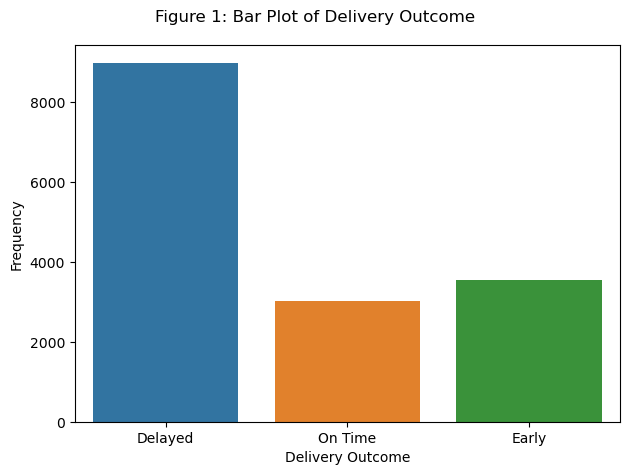

In [13]:
fig, ax = plt.subplots()
fig.suptitle("Figure 1: Bar Plot of Delivery Outcome")
sns.countplot(data=merged_df, x='label_display', hue='label_display', ax=ax)
ax.set_xlabel("Delivery Outcome")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

From Figure 1 we can see that there is a class imbalance in our target variable, delivery outcome (`label`). We will address this by applying SMOTE on the delivery outcome. Moreso, the class imbalance shows that most of the deliveries end up being delayed rather than on time or early. The reasons for this vary but can be extracted through additional visualizations.

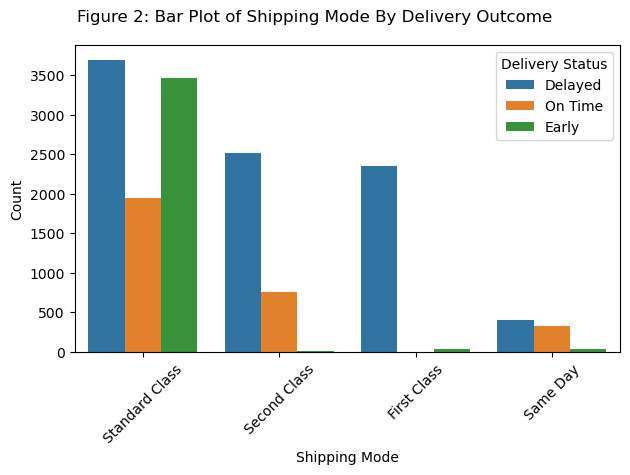

In [15]:
fig, ax = plt.subplots()
fig.suptitle("Figure 2: Bar Plot of Shipping Mode By Delivery Outcome")
sns.countplot(data=merged_df, x='shipping_mode', hue='label_display', ax=ax)
ax.set_xlabel("Shipping Mode")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

The bar plot shown in Figure 2, illustrates the count of obsevations for each shipping mode by the delivery status. From it, we can deduce that whether a delivery will be early or not depends on the time alotted before it will be considered on-time or delayed, as the standard class which is the slowest type of shipping has the most amount of early arrivals by a significant amount. This reflects the more lenient time window given for orders with standard class shipping. Therefore, the shipping mode may prove to be vital in helping predict whether an order will be delayed, on time, or early.

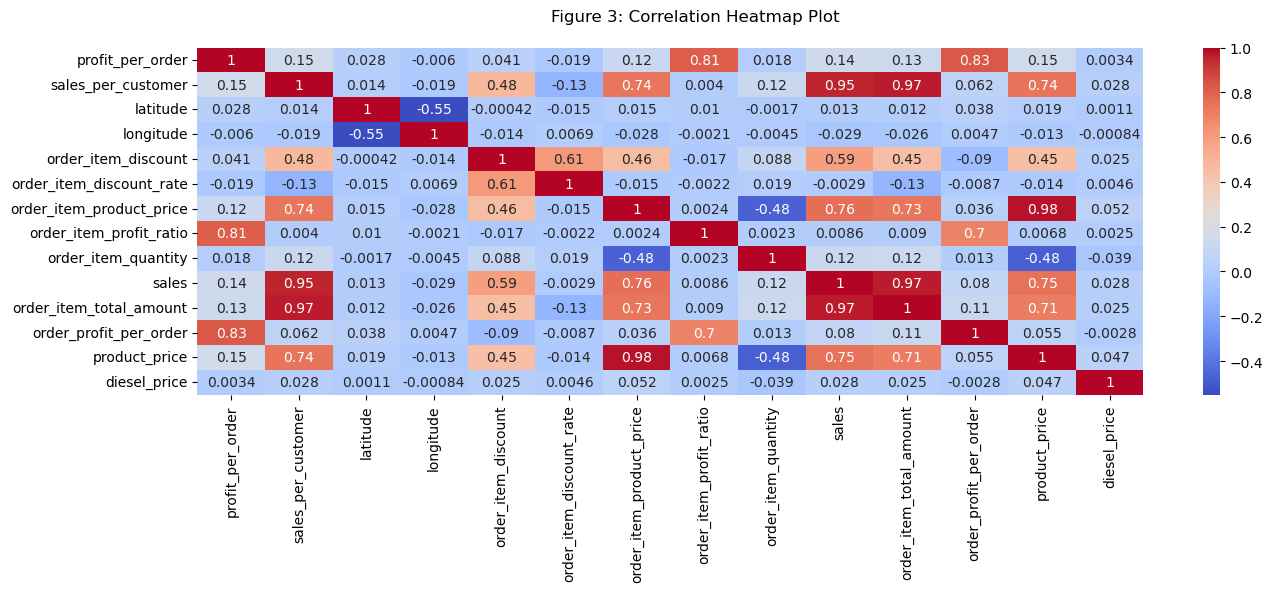

In [17]:
fig, ax = plt.subplots(figsize=(14, 6))
fig.suptitle("Figure 3: Correlation Heatmap Plot")
sns.heatmap(merged_df.drop(columns=id_cols).select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', ax=ax)
plt.tight_layout()
plt.show()

The correlation heatmap in Figure 3 helps showcase which numerical features are correlated with each other and we can extract a few useful insights from it. The most important one is there being multicollinearity among some of the features, particularly ones regarding the price and discount as there is an original price as well as the price after applying the discount, which should lead to it being correlated. Because logistic regression assumes no multicollinearity and we are focused on prediction, we will apply an L2 penalty in logistic regression, shrinking irrelevant or correlated predictors close to zero but not eliminating it entirely as some of these features may still be informative.

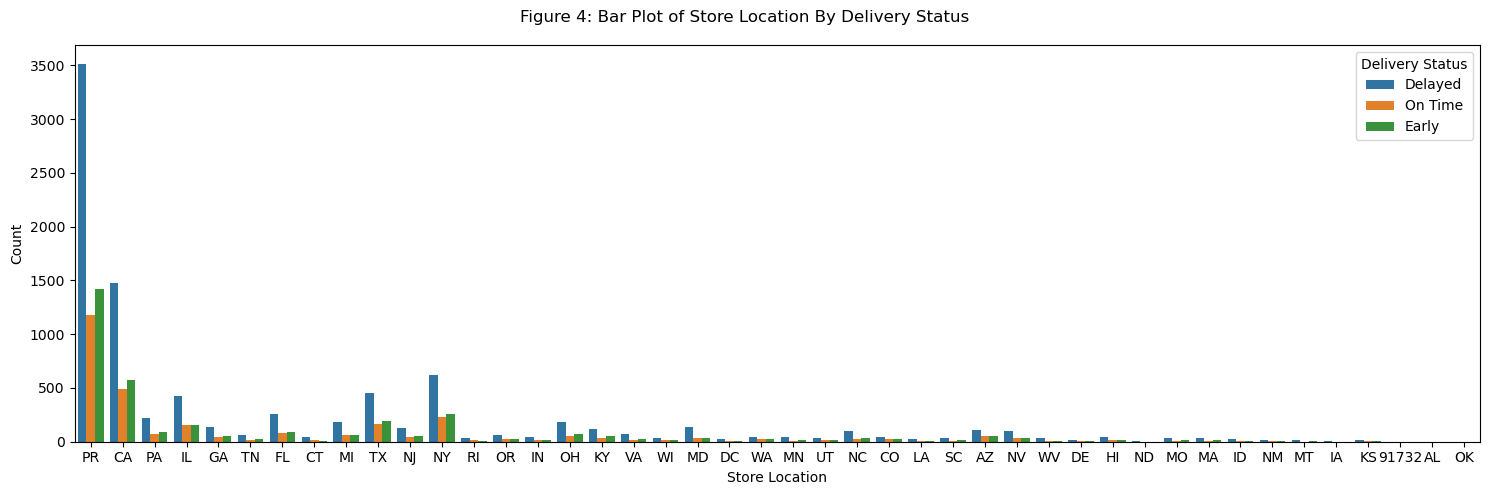

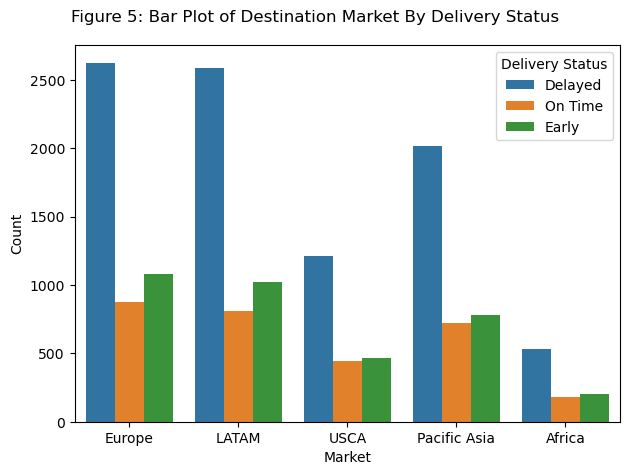

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle("Figure 4: Bar Plot of Store Location By Delivery Status")
sns.countplot(data=merged_df, x='customer_state', hue='label_display', ax=ax)
ax.set_xlabel("Store Location")
ax.set_ylabel("Count")
ax.legend(title='Delivery Status')
plt.tight_layout()
plt.show()
print()
fig, ax = plt.subplots()
fig.suptitle("Figure 5: Bar Plot of Destination Market By Delivery Status")
sns.countplot(data=merged_df, x='market', hue='label_display', ax=ax)
ax.set_xlabel("Market")
ax.set_ylabel("Count")
ax.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

In Figure 4 and Figure 5, we can see the frequency of where orders are delivered from and to, with Figure 4 showing a bar plot of where most of the deliveries come from and help indicate where this supply chain company is located in, relatively speaking. We can see they primarily work in Puerto Rico, California, and New York along with a few other states in the US. However, Figure 5 shows that most of their deliveries are to Europe and Latin America. This suggests the company is structured where orders are registered through U.S. stores or fulfillment centers but delivered internationally, indicating a **centralized processing hub serving cross-border customers.** This helps explain why there are so many delays in the dataset due to the distance of the deliveries being international rather than local.

Another note to make is there appears to be an invalid value in Figure 4, as there is a store location (`customer_state`) listed as '91732', it is very likely a zip code and we can determine the state of that zip code and replace it with the actual state abbreviation. In this case, the zip code is in California (CA). We will perform this during the data preprocessing.

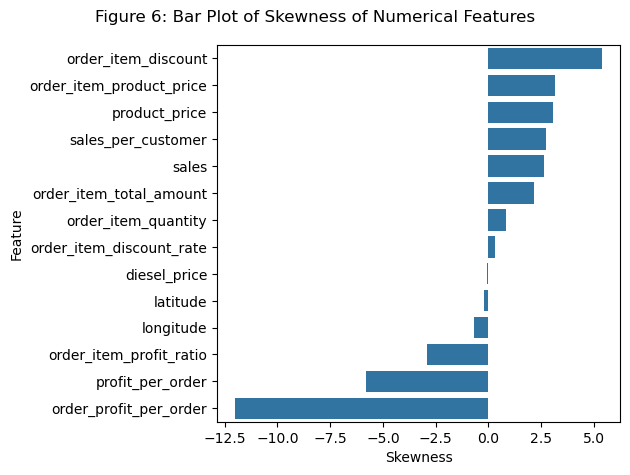

In [21]:
numerics = merged_df.drop(columns=id_cols).select_dtypes(include='number')
skew_df = numerics.apply(lambda x: x.skew()).sort_values(ascending=False)

fig, ax = plt.subplots()
fig.suptitle("Figure 6: Bar Plot of Skewness of Numerical Features")
sns.barplot(x=skew_df.values, y=skew_df.index, ax=ax)
ax.set_xlabel("Skewness")
ax.set_ylabel("Feature")
plt.tight_layout()
plt.show()

Lastly, Figure 6 shows that there exists some non-insignifcant skewness in some of the numeric features, most prominently the profit per order, profit per order after discount (`order_profit_per_order`), and the order item discount. We should likely apply a log transformation on all of these features asides from the item quantity, discount rate, diesel price, latitude, and longitude. While not having skewness isn't an assumption for logistic regression or more complex ML models, it can hinder performance in logistic regression models at the very least and should be addressed.

We will now begin preprocessing the data set for modeling.

### Preprocessing
First we will begin by extracting information from the date of the order and shipping, however, we need to check if there are any invalid rows where the shipping occurs before the order is placed.

In [24]:
print("Invalid rows:", (merged_df['shipping_date'] < merged_df['order_date']).sum())

Invalid rows: 5941


There is in fact about 5941 rows that are invalid, making this appear systematic. Since this is a good chunk of data to lose if we were to drop them, we will instead create a new column to flag a row as 1 if invalid, otherwise 0 and set the days between the two dates column to be NaN if that's the case and allow the median imputation to handle it. Now, we will extract the rest of the info we can from the dates. 

In [26]:
merged_df['order_dayofweek'] = merged_df['order_date'].dt.dayofweek
merged_df['order_month'] = merged_df['order_date'].dt.month
merged_df['order_year'] = merged_df['order_date'].dt.year
merged_df['is_weekend'] = merged_df['order_dayofweek'].isin([5, 6]).astype(int)

merged_df['days_between_order_and_ship'] = (merged_df['shipping_date'] - merged_df['order_date']).dt.days
merged_df['invalid_date_flow'] = (merged_df['shipping_date'] < merged_df['order_date']).astype(int)
merged_df.loc[merged_df['days_between_order_and_ship'] < 0, 'days_between_order_and_ship'] = np.nan

In [27]:
# Relabeling
column_relabel = {
    'profit_per_order': 'pre_discount_profit_per_order',
    'order_profit_per_order': 'post_discount_profit_per_order',
    'sales_per_customer': 'total_sales_per_customer',
    'order_item_product_price': 'item_price_before_discount',
    'order_item_total_amount': 'item_total_after_discount',
    'product_price': 'product_retail_price',
    'sales': 'total_sales',
    'order_item_discount': 'item_discount_amount',
    'order_item_discount_rate': 'item_discount_rate',
    'order_item_profit_ratio': 'item_profit_margin',
    'order_status': 'order_current_status',
    'order_state': 'order_delivery_state',
    'order_country': 'order_delivery_country',
    'order_city': 'order_delivery_city',
    'customer_country': 'customer_purchase_country',
    'customer_city': 'customer_purchase_city',
    'customer_state': 'store_location_state',
}

merged_df = merged_df.rename(columns=column_relabel)
print('Column Names After Relabeling:\n' + str(merged_df.columns))

Column Names After Relabeling:
Index(['payment_type', 'pre_discount_profit_per_order',
       'total_sales_per_customer', 'category_id', 'category_name',
       'customer_purchase_city', 'customer_purchase_country', 'customer_id',
       'customer_segment', 'store_location_state', 'customer_zipcode',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_delivery_city', 'order_delivery_country', 'order_customer_id',
       'order_date', 'order_id', 'order_item_cardprod_id',
       'item_discount_amount', 'item_discount_rate', 'order_item_id',
       'item_price_before_discount', 'item_profit_margin',
       'order_item_quantity', 'total_sales', 'item_total_after_discount',
       'post_discount_profit_per_order', 'order_region',
       'order_delivery_state', 'order_current_status', 'product_card_id',
       'product_category_id', 'product_name', 'product_retail_price',
       'shipping_date', 'shipping_mode', 'label', 'diesel_price',
       'label_

Sum of NAs in Columns with at least 1 NA:
diesel_price                     66
days_between_order_and_ship    5941
dtype: int64



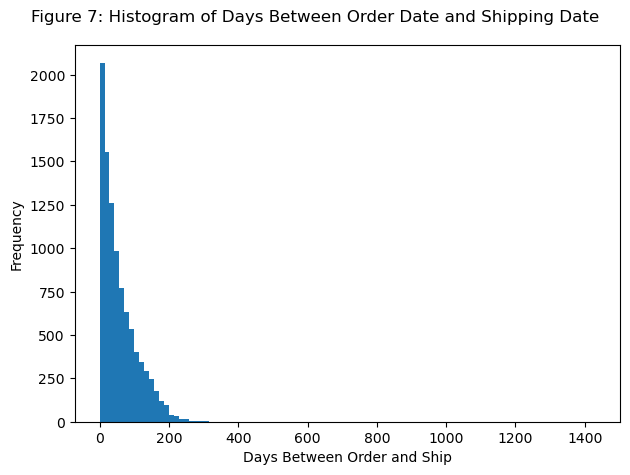

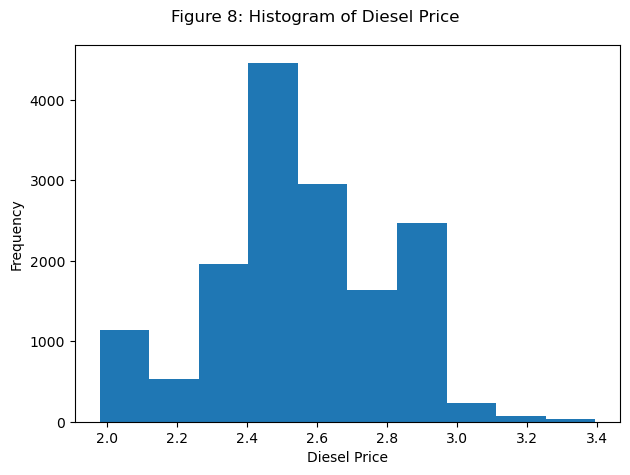

In [28]:
na_counts = merged_df.isnull().sum()
print(f'Sum of NAs in Columns with at least 1 NA:\n{na_counts[na_counts > 0]}') # Show sum of NAs for columns with at least 1 NA

print()
fig, ax = plt.subplots()
fig.suptitle("Figure 7: Histogram of Days Between Order Date and Shipping Date")
ax.hist(merged_df['days_between_order_and_ship'], bins=100)
ax.set_xlabel("Days Between Order and Ship")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

print()
fig, ax = plt.subplots()
fig.suptitle("Figure 8: Histogram of Diesel Price")
ax.hist(merged_df['diesel_price'], bins=10)
ax.set_xlabel("Diesel Price")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

We have 66 missing values in diesel price, we will impute those values with the median price. We will also replace the invalid value in `customer_state` of '91732' with 'CA', since the zipcode is in California according to Google. Next we will log transform skewed predictors that have no negative values with a small added constant, dummy encode categorical predictors, ordinal encode `shipping_mode`, and then finally standardize all remaining numeric predictors. To do the log transformation this we will create a simple function called `safe_log1p()`. In addition, for the days between order and shipping date, we will impute the NAs using the median because the values are skewed right.

For columns that are skewed but contain negative values, we will do a Yeo-Johnson transformation instead, which is similar to a Box-Cox transformation. 

For the target variable, `label`, we will label encode it turning it from (-1, 0, 1) to (0, 1, 2).

In [30]:
merged_df_copy = merged_df # Make a copy for merged_df to let xgboost handle NAs
merged_df['store_location_state'] = merged_df['store_location_state'].replace('91732', 'CA')
merged_df['diesel_price'] = merged_df['diesel_price'].fillna(merged_df['diesel_price'].mean())
merged_df['days_between_order_and_ship'] = merged_df['days_between_order_and_ship'].fillna(merged_df['days_between_order_and_ship'].median())

def safe_log1p(X):
    return np.log1p(np.nan_to_num(X)) + 1e-6

transform_cols = [
    'item_discount_amount', 'item_price_before_discount', 'product_retail_price',
    'total_sales_per_customer', 'total_sales', 'item_total_after_discount',
    'item_profit_margin', 'pre_discount_profit_per_order', 'post_discount_profit_per_order',
    'days_between_order_and_ship'
]

safe_log_cols = [col for col in transform_cols if (merged_df[col] >= 0).all()]
yeo_johnson_cols = [col for col in transform_cols if (merged_df[col] < 0).any()]

print('Columns to Log:', safe_log_cols)
print("Columns for Yeo-Johnson Transform:", yeo_johnson_cols)

ct = ColumnTransformer(
    [("log", FunctionTransformer(safe_log1p, feature_names_out='one-to-one'),
      safe_log_cols),
     ("yeojohnson", PowerTransformer(method='yeo-johnson'), yeo_johnson_cols),
     ("ordinal", OrdinalEncoder(categories=[['Standard Class', 'Second Class', 'First Class', 'Same Day']],
                                handle_unknown='use_encoded_value', unknown_value=-1), 
      ['shipping_mode']),     
     ("onehot", OneHotEncoder(drop='first'),
      ['payment_type', 'customer_purchase_country', 'customer_segment', 'department_name',
       'market', 'order_region', 'order_current_status', 'order_dayofweek', 'order_month'])], 
    remainder='passthrough', verbose_feature_names_out=False
)

Columns to Log: ['item_discount_amount', 'item_price_before_discount', 'product_retail_price', 'total_sales_per_customer', 'total_sales', 'item_total_after_discount', 'days_between_order_and_ship']
Columns for Yeo-Johnson Transform: ['item_profit_margin', 'pre_discount_profit_per_order', 'post_discount_profit_per_order']


In [31]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(merged_df['label'])

# Select only relevant and not redundant non-ID columns
X = merged_df.iloc[:, [0, 1, 2, 6, 8, 12, 13, 14, 15, 22, 
                       23, 25, 26, 27, 28, 29, 30, 31, 33, 
                       37, 39, 41, 43, 44, 45, 46, 47, 48]]

We have selected columns that not only do we believe to be important but also do not too many levels to avoid adding dimensionality to the data, as many categorical variables contained hundreds to thousands of levels, being too granular. Furthermore, these high-level factor variables were redundant in that other features contained similar information while at the same would add minimal dimensionality. For example, `customer_purchase_city`, having 555 levels, whereas `customer_purchase_country` has only 2 levels and `market` has 5 levels and still cover similar information.

After initial feature selection, we have retained 28 predictors.

Now that all the preprocessing is done, we will now perform a 70/30 training-test split stratified on the delivery outcome (`label`).

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7, random_state=1, stratify=y)

## Part IV

### Model Assumptions
Now we will check the necessary assumptions for each of the models listed below.

- **Logistic Regression**
  - Linearity of Log-Odds
  - Multicollinearity: We will address this by tuning the L2 penalty parameter
  - Outliers: Log-transformation and Yeo-Johnson to help mitigate outliers
  - Independence of observations: True by default, as one order’s delivery outcome doesn't affect another's.
- **Random Forest**
  - Independence of observations: True
  - Sufficient data: True, since we have more than 10 times the number of features in rows
- **XGBoost**
  - Independence of observations: True  
  - Sufficient data: True

In [35]:
numerics = ['pre_discount_profit_per_order', 'total_sales_per_customer', 'latitude',
            'longitude', 'item_discount_amount', 'item_discount_rate', 'item_price_before_discount',
            'item_profit_margin', 'total_sales', 'item_total_after_discount', 'post_discount_profit_per_order',
            'product_retail_price', 'diesel_price']

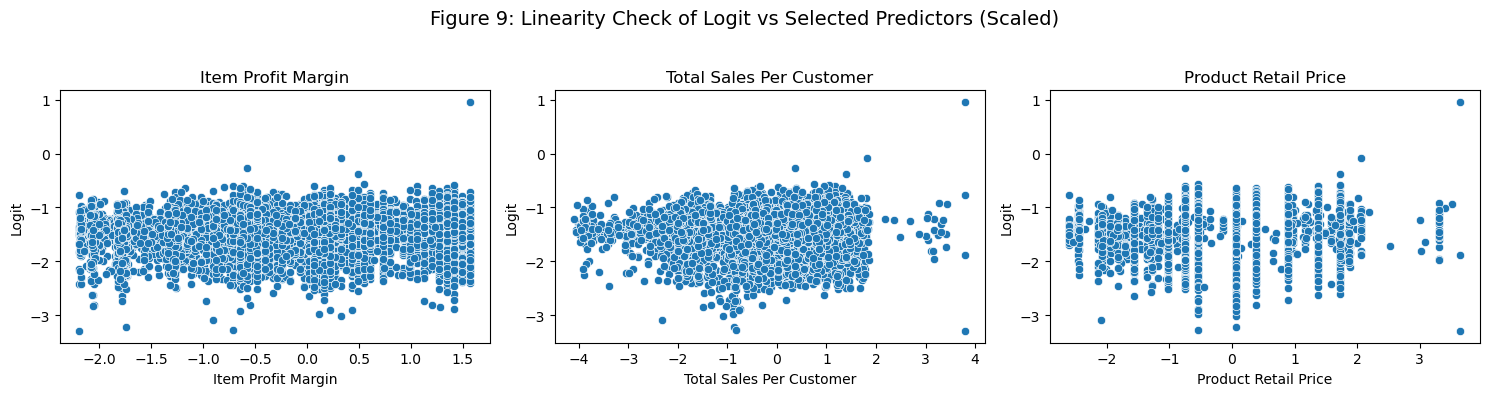

In [36]:
# Linearity of Log-Odds assumption check
X_ct = ct.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_ct)
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)
probs = model.predict_proba(X_scaled)[:, 1]
logit = np.log(probs / (1 - probs))

feature_names = ct.get_feature_names_out()
selected_features = ['item_profit_margin', 'total_sales_per_customer', 'product_retail_price']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle("Figure 9: Linearity Check of Logit vs Selected Predictors (Scaled)", fontsize=14)
for ax, feat in zip(axes, selected_features):
    i = [j for j, name in enumerate(feature_names) if feat in name][0]
    sns.scatterplot(x=X_scaled[:, i], y=logit, ax=ax)
    ax.set_title(f"{feat.replace('_', ' ').title()}")
    ax.set_xlabel(f"{feat.replace('_', ' ').title()}")
    ax.set_ylabel("Logit")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

For brevity, we plotted the logit against only a few continuous predictors as seen in Figure 9, in which there is insufficient visual evidence to meet the linearity of log-odds assumption for logistic regression. Instead, our predictors seem to follow a uniform distribution, suggesting a nonlinear model may be better suited. Therefore our logistic regression model will not be interpretable, but can still be used for prediction which is still suitable for goal, as we are prioritizing prediction (performance) over interpretation. 

### Modeling
#### Multiclass Classification
We can now finally begin building our models, starting with logistic regression, followed by random forest, and lastly a boosted model. All three models will incorporate hyperparameter tuning using 5 fold cross-validation, stratified by the delivery outcome.

First we will start out by building multiclass models to predict each delivery outcome instead of binarizing the outcome.

In [39]:
def evaluate_model(display_name, y_test, y_pred, y_prob, classes):
    print(f"\n{display_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Weighted Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Weighted Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Weighted Recall by Class: {recall_score(y_test, y_pred, average=None)}")
    print(f"Weighted Precision by Class: {precision_score(y_test, y_pred, average=None)}")
    y_test_bin = label_binarize(y_test, classes=classes)
    auc = roc_auc_score(y_test_bin, y_prob, average='weighted', multi_class='ovr')
    print(f"Weighted ROC-AUC (OvR): {auc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

def run_grid_search_pipeline(display_name, pipeline, param_grid, 
                             X_train, y_train, X_test, y_test, scoring='roc_auc_ovr'):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=15, verbose=1, error_score='raise')
    grid.fit(X_train, y_train)
    print(f"\n{display_name} Best Params: {grid.best_params_}")
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)
    classes = np.unique(y_train)
    evaluate_model(display_name, y_test, y_pred, y_prob=y_prob, classes=classes)
    return best_model

#### Softmax Regression

In [41]:
lr_pipeline = Pipeline([("preprocess", ct),
                        ("impute", SimpleImputer(strategy="mean")),
                        ("scale", StandardScaler()),
                        ("smote", SMOTE(random_state=1)),
                        ("lr", LogisticRegression(random_state=1, solver='lbfgs', max_iter=1000))])

lr_param_grid = {'lr__C': np.logspace(-4, 4, 10)}

best_lr = run_grid_search_pipeline("Logistic Regression", lr_pipeline, lr_param_grid, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Logistic Regression Best Params: {'lr__C': 0.046415888336127774}

Logistic Regression
Accuracy: 0.5314
Weighted Recall: 0.5314
Weighted Precision: 0.6116
Weighted Recall by Class: [0.88815789 0.14207048 0.52172299]
Weighted Precision by Class: [0.39017341 0.2393321  0.82453052]
Weighted ROC-AUC (OvR): 0.6876
Confusion Matrix:
[[ 945   80   39]
 [ 519  129  260]
 [ 958  330 1405]]


Logistic Regression performed well on early deliveries with high recall (88.82%) and excellent delayed precision (82.45%), but struggled to identify on-time deliveries (Recall: 14.21%, Precision: 23.93%), leading to a low overall accuracy (53.14%) and limited generalizability.

#### Multiclass Random Forest

In [44]:
rf_pipeline = Pipeline([
    ("preprocess", ct),
    ("impute", SimpleImputer(strategy="mean")),
    ("scale", StandardScaler()),
    ("smote", SMOTE(random_state=1)),
    ("rf", RandomForestClassifier(random_state=1, n_jobs=15))
])

rf_param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'rf__min_samples_split': [2, 5]
}

best_rf = run_grid_search_pipeline("Random Forest", rf_pipeline, rf_param_grid, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Random Forest Best Params: {'rf__max_depth': 20, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}

Random Forest
Accuracy: 0.5880
Weighted Recall: 0.5880
Weighted Precision: 0.5535
Weighted Recall by Class: [0.64567669 0.02973568 0.75343483]
Weighted Precision by Class: [0.41286058 0.29032258 0.6977304 ]
Weighted ROC-AUC (OvR): 0.7309
Confusion Matrix:
[[ 687   31  346]
 [ 348   27  533]
 [ 629   35 2029]]


Random Forest improved delayed recall to 75.34%, but completely failed to identify on-time deliveries (Recall: 2.97%). Although its accuracy (58.80%) was better than Logistic Regression, the imbalance in per-class performance makes it unreliable for multiclass prediction.

#### Multiclass XGBoost

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(merged_df_copy['label'])
X = merged_df_copy.iloc[:, [0, 1, 2, 6, 8, 12, 13, 14, 15, 22, 
                       23, 25, 26, 27, 28, 29, 30, 31, 33, 
                       37, 39, 41, 43, 44, 45, 46, 47, 48]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7, random_state=1, stratify=y)

xgb_pipeline = Pipeline([
    ("preprocess", ct),
    ("scale", StandardScaler()),
    ("smote", SMOTE(random_state=1)),
    ("xgb", XGBClassifier(objective='multi:softprob', random_state=1, n_jobs=15, eval_metric='mlogloss'))
])

xgb_param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [10, 20],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__subsample': [0.8, 1.0]
}

best_xgb = run_grid_search_pipeline("XGBoost", xgb_pipeline, xgb_param_grid, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


XGBoost demonstrated the most balanced multiclass performance, with decent recall across early (78.10%), on-time (9.80%), and delayed (70.29%) classes. It had the highest multiclass ROC-AUC (0.7516), making it the best among multiclass models despite only moderate accuracy (60.30%). Therefore, we will use this model as the basis for a binary classification model below for comparison.

#### Binary Classification w/ SMOTE

Now, for the best performing model, we will see how it would compare if instead of having multiple classes to predict we will simply predict if the delivery is delayed or not. We will do this by mapping early and on-time deliveries to the same label (0; negative class). In addition, our scoring metric for tuning should be changed to recall, since we care most about capturing as many delays as possible to reduce customer dissatisfaction.

In [ ]:
def evaluate_model_binary(display_name, y_test, y_pred, y_proba):
    print(f"\n{display_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

def run_grid_search_pipeline_binary(display_name, pipeline, param_grid, 
                             X_train, y_train, X_test, y_test, scoring='recall'):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=15, verbose=1, error_score='raise')
    grid.fit(X_train, y_train)
    print(f"\n{display_name} Best Params: {grid.best_params_}")
    y_pred = grid.best_estimator_.predict(X_test)
    y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]
    evaluate_model_binary(display_name, y_test, y_pred, y_proba)
    return grid.best_estimator_

In [ ]:
y = (merged_df_copy['label'] == 1).astype(int).values
X = merged_df_copy.iloc[:, [0, 1, 2, 6, 8, 12, 13, 14, 15, 22, 
                       23, 25, 26, 27, 28, 29, 30, 31, 33, 
                       37, 39, 41, 43, 44, 45, 46, 47, 48]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7, random_state=1, stratify=y)

In [ ]:
xgb_pipeline = Pipeline([
    ("preprocess", ct),
    ("scale", StandardScaler()),
    ("smote", SMOTE(random_state=1)),
    ("xgb", XGBClassifier(objective='binary:logistic', random_state=1, n_jobs=15, eval_metric='logloss'))
])

xgb_param_grid = {
    'xgb__n_estimators': [90, 100, 110],
    'xgb__max_depth': [5, 6, 7],
    'xgb__learning_rate': [0.005, 0.01, 0.015],
    'xgb__subsample': [0.5, 0.6, 0.7]
}

best_xgb_binary = run_grid_search_pipeline_binary("XGBoost (Binary Classification)", xgb_pipeline, xgb_param_grid, 
                                                  X_train, y_train, X_test, y_test)

This model has the highest precision (83.90%) and accuracy (71.62%), but lower recall (62.90%), indicating it was more conservative in flagging delays — favoring fewer false positives but at the cost of missing actual delays. Our final step should be to see how the model performs without using SMOTE, as by binarizing the outcome, the class imbalance is mitigated a considerable amount as the minority class (not delayed) now makes up about 43% of the data compared to 23% for early deliveries and 19.4% for on-time deliveries.

#### Binary w/o SMOTE

In [ ]:
xgb_pipeline = Pipeline([
    ("preprocess", ct),
    ("scale", StandardScaler()),
    ("xgb", XGBClassifier(objective='binary:logistic', random_state=1, n_jobs=15, eval_metric='logloss'))
])

xgb_param_grid = {
    'xgb__n_estimators': [90, 100, 110, 500],
    'xgb__max_depth': [5, 6, 7, 10],
    'xgb__learning_rate': [0.005, 0.01, 0.015],
    'xgb__subsample': [0.5, 0.6, 0.7]
}

best_xgb_binary = run_grid_search_pipeline_binary("XGBoost (Binary Classification)", xgb_pipeline, xgb_param_grid, 
                                                  X_train, y_train, X_test, y_test)

After removing SMOTE, the XGBoost binary model performed the best in terms of recall (87.63%) and has a similar ROC-AUC (0.7741), this version prioritized catching more delays even at the expense of some precision (64.62%). This makes it ideal for reducing false negatives, the primary goal in delay prediction.

### Model Comparison
**Table 2: Model Metrics Comparison**

| Model                                 | Accuracy | Recall | Precision | ROC-AUC | Recall (Early) | Recall (On-Time) | Recall (Delayed) | Precision (Early) | Precision (On-Time) | Precision (Delayed)
|---------------------------------------|----------|--------|-----------|---------|----------------|------------------|------------------|-------------------|---------------------|-------------------- 
| Logistic Regression                   | 0.5314   | 0.5314 | 0.6116    | 0.6876  | **0.8882** | **0.1421** | 0.5217      | 0.3902     | 0.2393     | **0.8245**
| Random Forest                        | 0.5880    | 0.5880 | 0.5535    | 0.7309  | 0.6457     | 0.0297     | **0.7534**  | 0.4129     | 0.2903     | 0.6977
| XGBoost                              | 0.6030    | 0.6030 | 0.6204    | 0.7516  | 0.7810     | 0.0980     | 0.7029      | **0.4225** | **0.4450** | 0.7578
| XGBoost (Binary w/ SMOTE)            | **0.7162** | 0.6290 | **0.8390** | **0.7757**  | - | - | - | - | - | -
| 🏆 **XGBoost (Binary w/o SMOTE)**    | 0.6517 | **0.8763** | 0.6462 | 0.7741  | - | - | - | - | - | -

  
Among the models tested, the **binary XGBoost model without SMOTE** stood out as the most effective overall, especially in line with the project's primary goal: accurately detecting delayed deliveries. With a recall of 0.8763, it captured the vast majority of actual delays, which is crucial in logistics where missing a late shipment can lead to broken service promises and unhappy customers. While its precision (0.6462) is moderately lower than some alternatives, the trade-off is acceptable — in this context, it's far better to flag a few non-delayed shipments than to miss real delays. The model also posted a strong ROC-AUC score of 0.7741, confirming its overall reliability in distinguishing between delayed and non-delayed cases. **Its ability to detect nearly all delays makes it the most aligned with business needs.** 

In comparison, the **binary XGBoost model with SMOTE** achieved the highest accuracy (0.7162) and precision (0.8390) across all models, indicating it was very confident in the predictions it made. However, it did so at the expense of recall (0.6290), meaning it missed more actual delays. This type of model may be better suited to use cases where false positives are more costly than false negatives, which isn’t the case here — our priority is to catch as many true delays as possible. **Its conservative nature trades recall for confidence, making it less ideal here.** 

Moving on to the multiclass models, the **multiclass XGBoost model** delivered the best performance among the multiclass classifiers. It showed a strong ability to identify both early (recall: 0.7810) and delayed (recall: 0.7029) deliveries. However, it struggled to correctly identify on-time shipments, with a low on-time recall of 0.0980. For businesses that need to accurately distinguish between all three delivery outcomes — early, on-time, and delayed — this imbalance could limit the model’s practical value. **It performs well for extremes but lacks balance for midrange outcomes.** 

Next, the **random forest model** produced a mixed performance. It matched the multiclass XGBoost in identifying delayed deliveries (recall: 0.7534) but nearly failed to detect on-time shipments (recall: 0.0297). This skew suggests a significant challenge with class imbalance, where the model is overfitting to extreme cases and struggling to generalize. **Its inability to detect on-time deliveries limits its reliability.** 

Finally, the **logistic regression model** was the weakest across most categories. While it did well in detecting early deliveries (recall: 0.8882) and was highly precise when predicting delays (precision: 0.8245), it struggled overall — with low on-time recall (0.1421), poor accuracy (0.5314), and the weakest ROC-AUC (0.6876). Its simplicity limits its ability to handle the complexity of delivery classification, especially for more ambiguous cases. **Its lack of flexibility makes it unsuitable for this task.**

**The final chosen model is the binary XGBoost model without SMOTE.** It most effectively satisfies the project’s objective of accurately identifying delayed deliveries, achieving the highest recall among all models. This means it correctly flags the greatest number of actual delays, which is critical in logistics, where failing to anticipate late shipments can harm customer trust and disrupt downstream operations. While its precision is considerably lower than that of the SMOTE-enhanced version, the business context prioritizes minimizing false negatives over false positives. Missing a delay poses far greater risk than mistakenly predicting one. Additionally, the model demonstrated strong overall discrimination with a high ROC-AUC, further reinforcing its reliability. Its balance of high sensitivity and robust generalization makes it the most operationally valuable model for proactive delay management.

## Project Summary
This machine learning project set out to predict delivery outcomes—early, on-time, or delayed—based on real-world logistics data. Using a combination of internal order features and external diesel price trends, we engineered features and evaluated several classification models. After thorough preprocessing and tuning, the **binary XGBoost model without SMOTE emerged as the most effective** at identifying delayed deliveries—our primary business objective.
This model achieved the **highest recall (87.63%)**, helping minimize false negatives and maximize the detection of late shipments. While other models like Random Forest and Logistic Regression offered moderate performance, they struggled with class imbalance or failed to capture on-time deliveries effectively. The multiclass XGBoost model also performed well but did not match the recall of the binary approach.
As we discovered, applying machine learning to supply chain delivery data demonstrated measurable improvements in predictive accuracy. The selected model can help companies better anticipate delays, proactively manage logistics resources, and improve customer satisfaction.

---
## Data Sources
- [Logistics Supply Chain Dataset (Kaggle)](https://www.kaggle.com/datasets/pushpitkamboj/logistics-data-containing-real-world-data)
- [U.S. Diesel Prices – U.S. EIA](https://www.eia.gov/dnav/pet/pet_pri_gnd_dcus_nus_w.htm)

## References

$^1$Grzybowska, K., & Kovács, G. (2023). The role of lead time variability in supply chain risk management. *Journal of Intelligent Manufacturing*, 34, 1–17. https://doi.org/10.1007/s10845-023-02290-2

$^2$Ivanov, D., & Dolgui, A. (2017). A digital supply chain twin for managing the disruption risks and resilience in the era of Industry 4.0. *Annual Reviews in Control*, 44, 193–202. https://doi.org/10.1016/j.arcontrol.2017.03.001

$^3$Kong, J., Guo, W., & Liang, Y. (2024). Applications of machine learning in supply chain prediction and optimization. *Applied Sciences*, 14(11), 4688. https://doi.org/10.3390/app14114688

$^4$Pazoki, M., Samarghandi, H., & Behroozi, M. (2023). Increasing supply chain resiliency through equilibrium pricing and stipulating transportation quota regulation. *arXiv preprint arXiv:2308.00681*. https://arxiv.org/abs/2308.00681